# SENTIMENT ANALYSIS (NATURAL LANGUAGE PROCESSING)

### importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords  # Corrected
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud  # Corrected


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from scikitplot.metrics import plot_confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### import dataset

In [2]:
df_train = pd.read_csv(r"C:\Users\USER\Desktop\CNN image classification\resources\train.txt",delimiter=';',names =['text','label'])
df_val =pd.read_csv(r"C:\Users\USER\Desktop\CNN image classification\resources\val.txt",delimiter=';',names =['text','label'])

In [3]:
df_train 

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [4]:
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [5]:
#df =pd.concat([df_train,df_val])
df = df_train.copy()


In [6]:
df.reset_index(inplace=True,drop=True)

In [7]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df.tail()

,text,label
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


In [9]:
df.shape

(16000, 2)

In [10]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [11]:
df.label.nunique()

6

In [12]:
df.label.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

<AxesSubplot: >

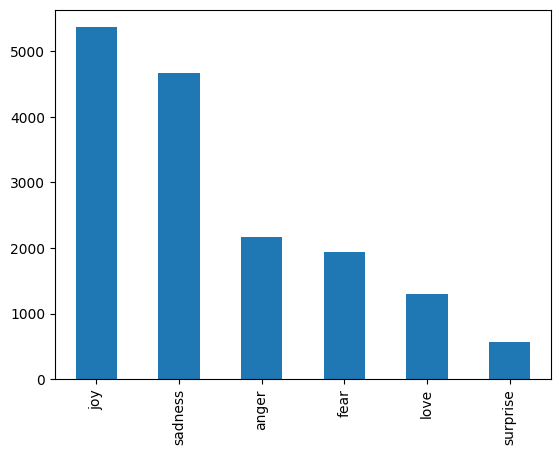

In [13]:
df.label.value_counts().plot(kind ='bar')

In [14]:
df['label'] =df['label'].map({'joy':1,'surprise':1,'love':1,'sadness':0,'anger':0,'fear':0})

In [15]:
df['label'].nunique()

2

In [16]:
#lm = WordNetLemmatizer()

In [17]:
'''''
def transform(df_column):
    output =[]
    for i in df_column:
        new_text = re.sub('[^a-zA-Z]',' ',str(i))
        new_text = new_text.lower()
        new_text = new_text.split()
        new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
        output.append(' '.join(str(k)for k in new_text))
    return output
'''

"''\ndef transform(df_column):\n    output =[]\n    for i in df_column:\n        new_text = re.sub('[^a-zA-Z]',' ',str(i))\n        new_text = new_text.lower()\n        new_text = new_text.split()\n        new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]\n        output.append(' '.join(str(k)for k in new_text))\n    return output\n"

In [18]:
import re
from textblob import Word

def transform(df_column):
    output = []
    for i in df_column:
        # Remove non-alphabetic characters and convert to lowercase
        new_text = re.sub('[^a-zA-Z]', ' ', str(i))
        new_text = new_text.lower()
        new_text = new_text.split()
        
        # Lemmatize each word using TextBlob's Word class
        lemmatized_words = [Word(word).lemmatize() for word in new_text]
        
        # Join the lemmatized words and append to the output
        output.append(' '.join(lemmatized_words))
    
    return output


In [19]:
var = transform(df.text)

In [20]:
var

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who care and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that wa',
 'ive been taking or milligram or time recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel a confused about life a a teenager or a jaded a a year old man',
 'i have been with petronas for year i feel that petronas ha performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirsty',
 'i ha

### wordcloud

In [21]:
plt.figure(figsize=(20,8))
word = ''

for i in var:
    for j in i:
        word += ' '.join(j)


<Figure size 2000x800 with 0 Axes>

In [22]:
word

'i didnt feel humiliatedi can go from feeling so hopeless to so damned hopeful just from being around someone who care and is awakeim grabbing a minute to post i feel greedy wrongi am ever feeling nostalgic about the fireplace i will know that it is still on the propertyi am feeling grouchyive been feeling a little burdened lately wasnt sure why that waive been taking or milligram or time recommended amount and ive fallen asleep a lot faster but i also feel like so funnyi feel a confused about life a a teenager or a jaded a a year old mani have been with petronas for year i feel that petronas ha performed well and made a huge profiti feel romantic tooi feel like i have to make the suffering i m seeing mean somethingi do feel that running is a divine experience and that i can expect to have some type of spiritual encounteri think it s the easiest time of year to feel dissatisfiedi feel low energy i m just thirstyi have immense sympathy with the general point but a a possible proto write

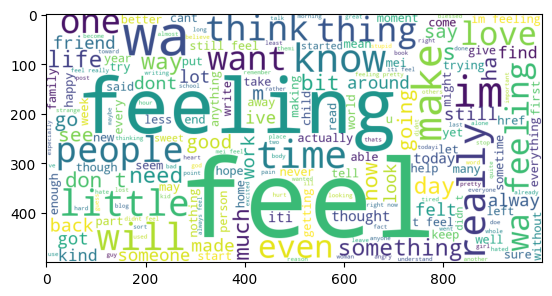

In [23]:
wc = WordCloud(width = 1000,height = 500,background_color= 'white',min_font_size= 10 ).generate(word)
plt.imshow(wc)

### Vectorization

In [24]:
cv = CountVectorizer(ngram_range =(1,2))

traindata = cv.fit_transform(var)

X_train =traindata
y_train =df.label

### Model selection

In [25]:
rf = RandomForestClassifier()

In [26]:
'''
parameters ={'max_features':('auto','sqrt'),
             'n_estimators':[500,1000],
             'max_depth':[5,10,None],
             'min_samples_leaf':[1,2,5,10],
             'min_samples_split':[5,10,15],
             'bootstrap':[True,False]

             }
             '''

"\nparameters ={'max_features':('auto','sqrt'),\n             'n_estimators':[500,1000],\n             'max_depth':[5,10,None],\n             'min_samples_leaf':[1,2,5,10],\n             'min_samples_split':[5,10,15],\n             'bootstrap':[True,False]\n\n             }\n             "

In [27]:
parameters = {
    'max_features': ('sqrt', 'log2'),  # Use 'sqrt' and 'log2'
    'n_estimators': [100, 200],         # Keep options for n_estimators
    'max_depth': [None],                 # Keep only None for simplicity
    'min_samples_leaf': [1, 2],          # Use only 1 and 2
    'min_samples_split': [5],            # Keep only 5
    'bootstrap': [True]                   # Use only True
}


In [28]:
parameters

{'max_features': ('sqrt', 'log2'),
 'n_estimators': [100, 200],
 'max_depth': [None],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [5],
 'bootstrap': [True]}

In [29]:
grid_search = GridSearchCV(rf,parameters,cv =3,return_train_score= True,n_jobs =1 )

In [30]:
grid_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [155]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [156]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [31]:
rf = RandomForestClassifier(
    bootstrap=True, 
    max_depth=None, 
    max_features='sqrt', 
    min_samples_leaf=2, 
    min_samples_split=5, 
    n_estimators=200
)

### Preparing test data

In [32]:
test_data = pd.read_csv(r"C:\Users\USER\Desktop\CNN image classification\resources\test.txt",names =['text','label'],delimiter =';')

In [33]:
test_data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [34]:
df1 = test_data.copy()

In [35]:
df1['label'] = df1['label'].map({'joy':1,'surprise':1,'love':1,'sadness':0,'anger':0,'fear':0})

<AxesSubplot: >

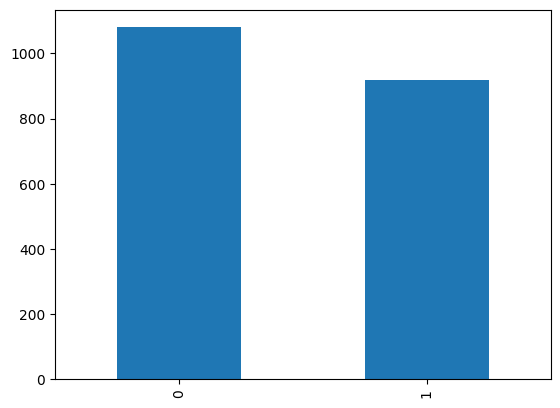

In [36]:
df1['label'].value_counts().plot(kind = "bar")

In [163]:
def transformation(df1_columns):
    output1 =[]
    for i in df1_columns:
        new_test1 =  re.sub('[^a-zA-Z]','',str(i))
        new_test1 = new_test1.lower()
        new_test1 = new_test1.strip()
        new_test1 =[lm.lemmatize(j) for j in new_test1 if j not in set(stopwords.words('english'))]
        output1.append(' '.join(str(k)for k in new_test1))
    return output1


In [37]:
va1 = transform(df1.text)

In [38]:
va1

['im feeling rather rotten so im not very ambitious right now',
 'im updating my blog because i feel shitty',
 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
 'i left with my bouquet of red and yellow tulip under my arm feeling slightly more optimistic than when i arrived',
 'i wa feeling a little vain when i did this one',
 'i cant walk into a shop anywhere where i do not feel uncomfortable',
 'i felt anger when at the end of a telephone call',
 'i explain why i clung to a relationship with a boy who wa in many way immature and uncommitted despite the excitement i should have been feeling for getting accepted into the master program at the university of virginia',
 'i like to have the same breathless feeling a a reader eager to see what will happen next',
 'i jest i feel grumpy tired and pre menstrual which i probably am but then again it only been a week and im about a fit a a walrus on vacation for the summer',
 'i don t feel par

In [39]:
word1 =''
for i in va1:
    for j in i:
        word1 += ' '.join(j)


In [40]:
word1

'im feeling rather rotten so im not very ambitious right nowim updating my blog because i feel shittyi never make her separate from me because i don t ever want her to feel like i m ashamed with heri left with my bouquet of red and yellow tulip under my arm feeling slightly more optimistic than when i arrivedi wa feeling a little vain when i did this onei cant walk into a shop anywhere where i do not feel uncomfortablei felt anger when at the end of a telephone calli explain why i clung to a relationship with a boy who wa in many way immature and uncommitted despite the excitement i should have been feeling for getting accepted into the master program at the university of virginiai like to have the same breathless feeling a a reader eager to see what will happen nexti jest i feel grumpy tired and pre menstrual which i probably am but then again it only been a week and im about a fit a a walrus on vacation for the summeri don t feel particularly agitatedi feel beautifully emotional know

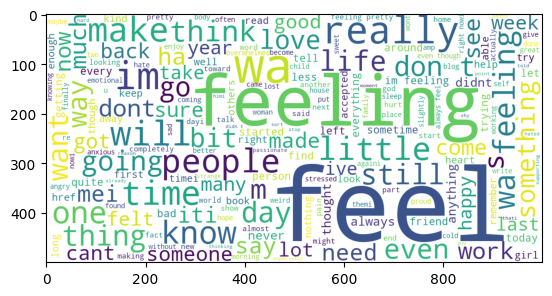

In [41]:
wc1 = WordCloud(width = 1000,height = 500,background_color= 'white',min_font_size= 10 ).generate(word1)
plt.imshow(wc1)

In [42]:
testdata = cv.transform(va1)
X_test = testdata
y_test = df1.label

### Prediction

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [44]:
y_pred = rf.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9525

In [46]:
res = pd.DataFrame({ 'acutal': y_test,
                    'pred' :y_pred

})

print(res)

      acutal  pred
0          0     0
1          0     0
2          0     0
3          1     1
4          0     0
...      ...   ...
1995       0     0
1996       0     0
1997       1     1
1998       1     1
1999       0     0

[2000 rows x 2 columns]


In [47]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Load the model (for future use)
with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)




# Save the CountVectorizer
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)


In [48]:
def classify_sentence(input_sentence):
    # Preprocess the input sentence
    processed_sentence = transform(input_sentence)
    
    # Vectorize the input sentence (use the same vectorizer used for training)
    vectorized_input = cv.transform([processed_sentence])
    
    # Predict the label using the loaded model
    prediction = loaded_rf.predict(vectorized_input)[0]
    
    # Check if the prediction is 0 (Negative) or 1 (Positive)
    if prediction == 0:
        return "Negative"
    else:
        return "Positive"


In [49]:
def classify_sentence(input_sentence):
    # Preprocess the input sentence
    processed_sentence = transform([input_sentence])[0]  # Process the single input sentence
    
    # Vectorize the input sentence (use the same vectorizer used for training)
    vectorized_input = cv.transform([processed_sentence])
    
    # Predict the label using the loaded model
    prediction = loaded_rf.predict(vectorized_input)[0]
    
    # Check if the prediction is 0 (Negative) or 1 (Positive)
    return "Negative" if prediction == 0 else "Positive"

# Example usage
input_sentence = "i don t feel particularly agitated"

# Classify the sentence
result = classify_sentence(input_sentence)

print(f"The sentiment of the input sentence is: {result}")

The sentiment of the input sentence is: Negative
